<center><strong>A Journey Into Math For Machine Learning</strong></center>
<center><strong>机器学习之数学之旅</strong></center>
<center><strong>图解极大似然估计$(maximum \ likelihood \ estimation \ with \ 3D \ visualization)$</strong></center>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Image 
init_notebook_mode(connected=True)

In [9]:
def draw_likelihood(observations, mu, sigma):
    # 定义y轴取值
    plt.ylim(-0.02,1)
    # 定义一个画图范围
    x_locs =  np.linspace(-10, 10, 500)
    # 画出推断的概率分布的概率密度函数
    plt.plot(x_locs, stats.norm.pdf(x_locs, loc=mu, scale=sigma), label="inference")
    for obs in observations:
        plt.axvline(x=obs, ymin=0, ymax=stats.norm.pdf(obs, loc=mu, scale=sigma)+0.01, c="g")
    plt.axvline(x=obs, ymin=0, ymax=stats.norm.pdf(obs, loc=mu, scale=sigma)+0.01, c="g", label="probabilities")
    # 画出观测数据的概率
    plt.scatter(x=observations, y=[0 for _ in range(len(observations))], c="r", marker="o", label="obsevations")
    plt.legend()
    plt.grid()
    plt.title("mean={} sigma={}".format(str(mu), str(sigma)))
    plt.show()

**极大似然估计**是神经网络和很多复杂模型得以优化求解的理论基础, 我们今天来学习并试着深入理解极大似然估计的原理和推导, 最后我们对极大似然估计进行3D可视化, 建立一种直观的认识.
   
要理解**极大似然估计**是什么, 首先要明白**概率密度(质量)函数**是什么, 如果你不知道的话, 那就简短解释一下：   
概率密度函数用来描述某个随机变量取某个值的时候，取值点所对应的的**概率**$(probability)$的函数.   
如下图, 我们现在有一个**概率分布**, 属于**正态分布**: $$X \sim N(\mu,\sigma^2), \quad  f(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}} \, \exp \left( -\frac{(x- \mu)^2}{2\sigma^2} \right)$$

其中$\mu$是均值, $\sigma$是标准差. 如果你不熟悉正态分布, 我们简单回顾一下$\mu$指的是均值, 在下图中, 均值是$0$则正态分布的概率在均值处概率最高, 以均值为中心两边是对称的,  $\sigma$是标准差, 标准差控制着概率分布偏离均值的程度, 标准差越大概率分布越扁平, 越小的话, 概率分布越集中于均值.   
   
我们另有一个**数据点**, 是一个**随机变量**, 取值$2.5$, 我们将$x=2.5$代入$f(x;\mu=5,\sigma=2)$得出下图出中绿色直线的长度, 也就是得到了$P(x=2.5 \mid \mu=5, \sigma=2)$    
意义为$x=2.5$在上面定义的正态分布中的概率, 也就是给定一个概率分布, 随机变量在这个概率分布中出现的可能性, 而$f(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}} \, \exp \left( -\frac{(x- \mu)^2}{2\sigma^2} \right)$就是概率密度函数.   
概率质量函数是离散的, 概率密度函数是连续的, 意义相同, 为了可视化的方便, 今天用概率密度函数来讲解极大似然估计.

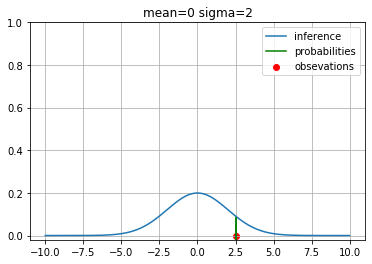

In [10]:
draw_likelihood([2.5], mu=0, sigma=2)

**概率**和**似然**的区别:   
**概率**，是在已知一些概率分布参数的情况下，预测观测的结果；   
**似然**，则是用于在已知某些观测所得到的结果时，对观测结果所属于的的概率分布的参数进行估值。
   
**极大似然估计**的目的在于找到一个最符合当前观测数据的概率分布.   
1. 我们先理解似然函数是什么
例如下面两图中: **红色圆点**指的是观测到的随机变量, **蓝色的线**是概率密度函数的图像, **绿色的直线**的**长度**所对应的$y$轴的值指的是是观测的数据出现在当前概率分布中的可能性, 也就是概率, 概率是介于$[0，1]$之间的实数, 我们用$P(x \mid \mu,\sigma)$来表示绿色线的长度, 也就是概率.   

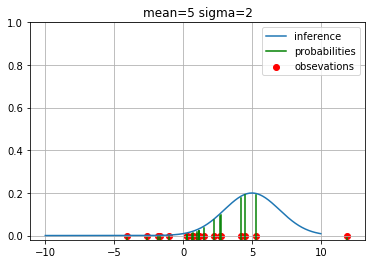

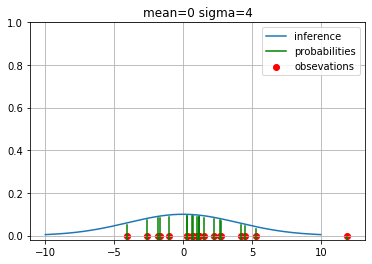

In [11]:
obs_mu, obs_sigma = 0, 4
observations = np.random.normal(obs_mu, obs_sigma, 20)
draw_likelihood(observations, mu=5, sigma=2)
draw_likelihood(observations, mu=0, sigma=4)

2. 我们假设有一组观测到的数据, 一共有$N$个, $X_{observation} = \{ x_1, x_2, ... , x_N\}$   
我们推断这一组数据属于一个概率分布, 是一个正态分布, 它的概率密度函数为$f(x;\mu,\sigma)$, 我们将$X_{observation}$里的数据点带入到$f(x;\mu,\sigma)$里, 得到每个数据点在我们假设的概率分布中的出现的可能性, 注意我们接下来简写$X_{observation}$为$X$:
$$P(x_1 \mid \mu,\sigma), \,P(x_2 \mid \mu,\sigma)\, , ... \, ,\,P(x_N \mid \mu,\sigma)$$
3. 那么这一组数据$X_{observation} = \{ x_1, x_2, ... , x_N\}$在假设的概率分布中的出现的可能性就是他们概率的乘积:
$$L(\mu ,\sigma \mid X)=P(X \mid \mu ,\sigma)=\prod _{i=1}^{N}P(x_{i}\mid \mu,\sigma)$$
上式中, 我们用$L(\mu ,\sigma \mid X)$来表示似然函数, 已知的观测到的数据点$X$, 用似然函数$L(\mu ,\sigma \mid X)$来估计参数$\mu ,\sigma$的可能性, 由此可见，似然函数也是一种条件概率函数，但我们关注的变量改变了.   
   
4. 从下面两图可得, 上图图中所假设的概率分布求出的似然函数取值显然比下面的小, 因为有很接近于$0$的数值, 这让似然函数乘积的结果变得非常小. 我们可以得出结论, 下图的概率分布参数更符合观测到的数据点的概率分布,而**最大似然估计**的目的就是找到一个最符合当前数据的分布的参数.

我们做个试验:
1. 先从均值为$0$, 标准差为$4$正态分布中随机抽取$200$个数据点, 作为我们观测到的数据;
之后我们定义一个估计参数的取值范围, 均值在$(-0.5, 0.5)$之间, 标准差在$(3.5, 4.5)$之间;   
2. 然后我们将所有的数据点和我们估计的每一组参数代入似然函数, 也就是$L(\mu ,\sigma \mid X)=\prod _{i=1}^{N}P(x_{i}\mid \mu,\sigma)$中, 求得每一组参数的似然值, 3.下图可见, 似然函数的值约在$\mu=0, \ \sigma=4$时取得极大值(因为数据点太少有些误差);
4. 我们发现似然函数的图像是凸函数, 我们就可以用很多优化的方法求它的极大值了.
5. 找到似然函数极大值的过程就是极大似然估计的过程.

In [2]:
# 首先定义观测的数据分布, 我们定一个一个均值为0, 标准差为4的正态分布, 
# 并从中随机抽200个数据点作为观测到的数值
obs_mu, obs_sigma = 0, 4
observations = np.random.normal(obs_mu, obs_sigma, 200)

In [3]:
def likelihood(observations, infer_mu, infer_sigma):
    # 定义似然函数, observations为观测到的数据点
    # infer_mu, infer_sigma为推断的均值和标准差
    product_ = 1
    for obs in observations:
        # 代入每一个数据点到我们假设的概率密度函数内, 并求它们的积
        product_ *= stats.norm.pdf(obs, loc=infer_mu, scale=infer_sigma)
    return product_

In [4]:
# 我们定义一个参数的取值范围, 均值在(-0.5, 0.5)之间
# 标准差在(3.5, 4.5)之间
all_infer_mu = [i/10 for i in range(-5, 5)]
all_infer_sigma = [i/10 for i in range(35, 45)]

In [5]:
# 求得每一个参数组合的似然值
mle = []
for infer_mu in all_infer_mu:
    temp_lis = []
    for infer_sigma in all_infer_sigma:
        temp_lis.append(likelihood(observations, infer_mu, infer_sigma))
    mle.append(temp_lis)

In [8]:
# 进行似然函数的3D可视化
data = [go.Surface(x=all_infer_mu, y=all_infer_sigma, z=mle)]
layout = go.Layout(title="Likelihood", scene={"xaxis": {'title': "mean"}, "yaxis": {"title": "sigma"},"zaxis": {"title": "likelihood"}})
fig = go.Figure(data=data, layout=layout)
iplot(fig)

我们看到上图中的最高点$\mu \approx 0, \ \sigma \approx 4$, 是产生观测数据的真实概率分布的参数, 但是似然函数输出的值极小, 最高的值仅有$1*10^{-245}$

对数似然值$(log \ likelihood)$: 
我们对似然函数取$\log$, 就得到了对数似然函数:   
$$\mathcal {L}(\mu ,\sigma \mid X)=\sum _{i=1}^{N}\log P(x_{i}\mid \mu,\sigma)$$
为什么要对似然函数取对数?  
1. 首先原本的似然函数是很多条件概率的乘积, 我们在找极大值的时候需要求似然函数的导数, 而乘积的导数不方便计算, 取对数可以吧乘除变成加减;
2. 对似然函数取对数, 原本函数的极大值的位置没有改变;
3. 如果观测到的数据点比较多, 原始似然函数的乘积可能非常接近于0, 甚至超出计算机的储存位数限制, 这样就全变成0了, 取对数可以把接近于$0$的数变成很大的负数, 也就是把原本似然函数的取值范围从$0$到$1$扩展到了$-\infty$到$0$, 方便了计算.   
   
我们下面对$log \ likelihood$进行3D可视化, 可看到原始的似然函数和对数似然函数的最高点是一样的位置:

In [79]:
def log_likelihood(observations, infer_mu, infer_sigma):
    sum_ = 0
    for obs in observations:
        sum_ += stats.norm.logpdf(obs, loc=infer_mu, scale=infer_sigma)
    return sum_

In [82]:
mle = []
for infer_mu in all_infer_mu:
    temp_lis = []
    for infer_sigma in all_infer_sigma:
        temp_lis.append(log_likelihood(observations, infer_mu, infer_sigma))
    mle.append(temp_lis)

In [83]:
data = [go.Surface(x=all_infer_mu, y=all_infer_sigma, z=mle)]
layout = go.Layout(title="Log Likelihood", scene={"xaxis": {'title': "mean"}, "yaxis": {"title": "sigma"},"zaxis": {"title": "likelihood"}})
fig = go.Figure(data=data, layout=layout)
iplot(fig)